## Projeto 5

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
print(Path.cwd())

C:\Users\GabrielLigeiro\Documents\PLN\Projeto 5


In [3]:
home_PATH = Path.cwd()
fake_PATH = Path(home_PATH,"dados","Fake.br-Corpus-master","full_texts","fake").glob('**/*')
true_PATH = Path(home_PATH,"dados","Fake.br-Corpus-master","full_texts","true").glob('**/*')
print(fake_PATH)

<generator object Path.glob at 0x000002717BBF2A50>


In [4]:
# Fake 
fake_files_txt = [x for x in fake_PATH if x.is_file()]
fake = []
#Real
true_files_txt = [x for x in true_PATH if x.is_file()]
true = []


In [5]:
def replace_all(text, dic):
    for i, j in dic.iteritems():
        text = text.replace(i, j)
    return text
#dic = {"\n":"","\x":""}

In [6]:
def create_true_fake_list(fake_true_files_txt):
    fake_true_list = []
    for file in fake_true_files_txt:
        with open(file, 'r',encoding="utf8") as f:
            fake_true_list.append(f.read())
    return fake_true_list

In [7]:
fake = create_true_fake_list(fake_files_txt)
true = create_true_fake_list(true_files_txt)

In [8]:
fake[0]

'Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação pat

In [9]:
true[0]

'\ufeffO Podemos decidiu  expulsar o deputado federal Carlos Gaguim do partido após a Polícia Federal fazer buscas a apreensões no gabinete dele na Câmara. Com isso, a legenda abre espaço para receber a senadora expulsa pelo PMDB, Katia Abreu. Por meio de nota, a legenda informou que o afastamento do parlamentar já era algo acordado entre os filiados da sigla.  “Ainda que o parlamentar tenha comunicado a conclusão de sua desfiliação para esta semana, diante dos fatos noticiados hoje, a Executiva Nacional do Podemos solicita o imediato cancelamento de sua filiação dos quadros do partido”.\n\nO partido, que no passado chegou a cogitar lançar o parlamentar como candidato ao Senado, diz que “apoia a investigação com a ampla apuração dos eventuais crimes cometidos e a consequente responsabilização dos envolvidos, para que todos sejam punidos com o máximo rigor da Lei, independentemente de posição ou cargo ocupado”. '

### Pre Processing

In [10]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
fake_proc = [tknzr.tokenize(x) for x in fake]
true_proc = [tknzr.tokenize(x) for x in true]

In [11]:
fake_result = [1]*len(fake)
fake_result = [0]*len(true)

data_proc = fake_proc + true_proc
data_result = fake_result + fake_result

In [12]:
#" ".join(true_proc[3])

### Pre-Processed by Fake.Br

In [13]:
import pandas as pd
import numpy as np

In [14]:
preprocessed_PATH = Path(home_PATH,"dados","Fake.br-Corpus-master","preprocessed").glob('**/*')
preprocessd_file = [x for x in preprocessed_PATH if x.is_file()]

#### Bag of Words

In [15]:
df = pd.read_csv(preprocessd_file[0]).drop(columns=['index'])

In [16]:
df.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [17]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

corpus = list(df['preprocessed_news'])

wordfreq = {}
for doc in corpus:
    #print(sentence)
    tokens = tknzr.tokenize(doc)
    #print(tokens)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [18]:
len(wordfreq.keys())

79564

In [19]:
#get the most frequent
import heapq
most_freq = heapq.nlargest(2000, wordfreq, key=wordfreq.get)

In [20]:
%%time
doc_vectors = []
for doc in corpus:
    doc_tokens = tknzr.tokenize(doc)
    doc_vec = []
    for token in most_freq:
        if token in doc_tokens:
            doc_vec.append(1)
        else:
            doc_vec.append(0)
    doc_vectors.append(doc_vec)

Wall time: 40.9 s


In [21]:
doc_vectors = np.asarray(doc_vectors)

doc_vectors.shape

(7200, 2000)

In [22]:
X = doc_vectors
y = df['label']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC,LinearSVC

#classifier = SVC(gamma='auto')
classifier = LinearSVC()
classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, predicted)
print(f"Acurácia: {acc*100}%")

Acurácia: 94.86111111111111%


Confusion matrix, without normalization
[[683  35]
 [ 39 683]]
Normalized confusion matrix
[[0.95125348 0.04874652]
 [0.05401662 0.94598338]]


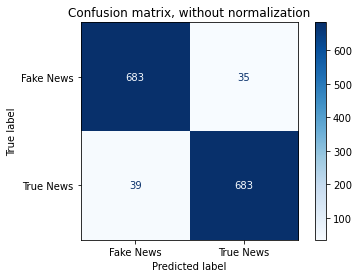

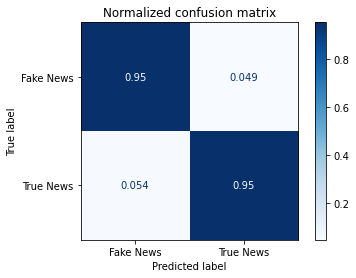

In [24]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names =['Fake News', "True News"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()